In [33]:
import csv
import os
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
# Pretty display for notebooks
%matplotlib inline

# Define a date range
dates = pd.date_range('2016-01-01', '2017-01-16')

In [41]:
# Load the all historical data
path =r'data/' # use your path
allFiles = glob.glob(os.path.join(path,'*.csv'))

#create dataFrame
df = pd.DataFrame(index=dates)

for csvdata in allFiles:
    # Read and join data
    stock_name = csvdata[5:-4] #get the stock name
    temp_df = pd.read_csv(csvdata, index_col='Date', parse_dates=True, usecols=['Date', 'Adj Close'], na_values='nan')
    temp_df = temp_df.rename(columns={'Adj Close': stock_name})
    df = df.join(temp_df)
    if stock_name == 'SPY':
        df = df.dropna(subset=['SPY'])
    
print df.head()

                  AAPL          FB        GOOG         SPY
2016-01-04  103.057063  102.220001  741.840027  196.794026
2016-01-05  100.474523  102.730003  742.580017  197.126874
2016-01-06   98.508268  102.970001  743.619995  194.640278
2016-01-07   94.350769   97.919998  726.390015  189.970552
2016-01-08   94.849671   97.330002  714.469971  187.885326


In [42]:
def plot_data(df, title="Stock prices"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()

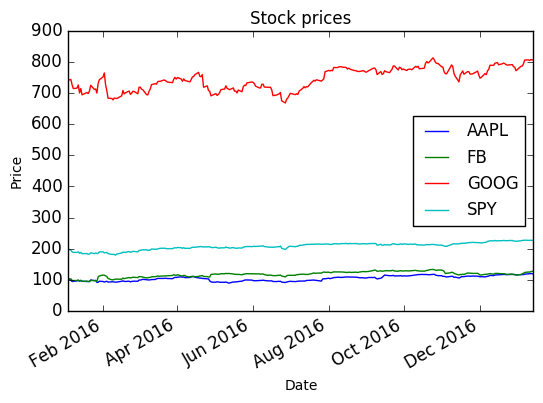

In [43]:
plot_data(df)

In [49]:
def get_bollinger_bands(rm, rstd):
    """Return upper and lower Bollinger Bands."""
    # Compute upper_band and lower_band
    upper_band = rm + 2*rstd
    lower_band = rm - 2*rstd
    return upper_band, lower_band

In [52]:
# Calculate rolling mean and rolling std, Bollinger Bands
rm_GOOG = df['GOOG'].rolling(window=20).mean()
rstd_GOOG = df['GOOG'].rolling(window=20).std()
upper_band, lower_band = get_bollinger_bands(rm_GOOG, rstd_GOOG)

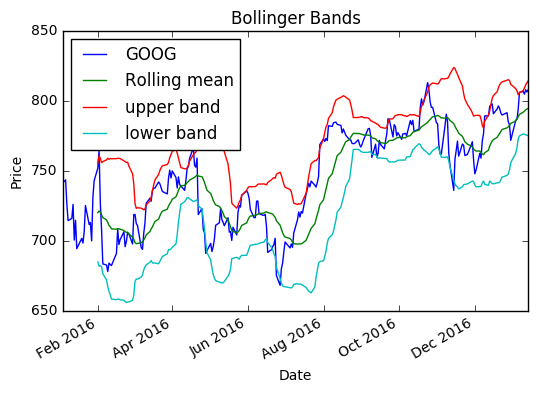

In [53]:
# Plot raw GOOG values, rolling mean and Bollinger Bands
ax = df['GOOG'].plot(title="Bollinger Bands", label='GOOG')
rm_GOOG.plot(label='Rolling mean', ax=ax)
upper_band.plot(label='upper band', ax=ax)
lower_band.plot(label='lower band', ax=ax)

# Add axis labels and legend
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend(loc='upper left')
plt.show()